# Chapter 3. 신경망

|퍼셉트론|좋은소식|나쁜소식|
|-|-|-|
||복잡한 함수도 다층 퍼셉트론으로 표현할 수 있다.|가중치를 직접 설정해줘야 한다.|

가중치를 직접 설정해줘야 하는 번거로움을 신경망으로 해결할 수 있다. 신경망은 입력층, 은닉층, 출력층으로 구성된다. 여기서 은닉층은 사람의 눈에는 보이지 않는다. 실제로 뉴런이 연결되는 방식은 퍼셉트론과 달라진 것이 없다. 

## 활성화 함수
퍼셉트론과 신경망의 가장 다른 점 중 하나는 활성화 함수일 것이다. 입력값에 가중치 w가 곱해지고, 편향 b가 더해지는 식의 변천 과정을 통해 활성화 함수를 들여다 보면,
1. y = b + x1w1 + x2w2: 이 값이 0을 넘으면 1을 출력, 넘지 않으면 0을 출력한다.
2. 위 식을 다시 함수로 적으면, y = h(b + x1w1 +x2w2)이고, 함수 h(x)는 x, 즉 여기서는 b + x1w1 + x2w2가 0을 넘으면 1을, 그렇지 않으면 0을 출력한다. 이는 1번과 같다.
3. 여기서 h(x) 함수를 활성화 함수라고 한다. 활성화 함수는 **입력 신호의 총합을 출력 신호로 변환하는 함수**이다. 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다. 지금까지의 식은 두가지 역할로 나눌 수 있다. 
  * 가중치가 곱해진 입력 신호의 총합을 계산하고,
  * 그 합을 활성화 함수에 입력해 결과를 내는.

이걸 식으로 만들어보면, a = b + x1w1 + x2w2, y = h(a)가 된다. 그림으로 보면 훨씬 이해가 잘됨. 밑바닥부터 시작하는 딥러닝 66페이지 참고할 것.

### 계단함수

In [ ]:
# 계단함수 구현하기
# 계단함수는 퍼셉트론에서 사용. 즉 신경망과 퍼셉트론의 차이는 활성화 함수를 뭘 쓰냐의 차이일 수도?

def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

위 함수는 간단하지만 문제가 있음. 인수 x가 실수만 받을 수 있다는 것인데, 예를 들어 step_function(3.0)은 되지만 step_function(np.array([1.0, 2.0]))과 같은 넘파이 배열을 인수로 받을 수는 없다. 이걸 해결하기 위해 다음과 같이 수정할 수 있다.

In [ ]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [ ]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0
y

array([False,  True,  True])

numpy에 부등호 연산을 하면 각각의 원소가 조건에 맞게 bool 결과가 생기고, 이 결과가 배열로 생성된다.  여기서 y가 bool 배열이다. 하지만 계단함수는 int, 즉 0이나 1을 출력하므로 배열 y의 결과를 int형으로 바꿔준다(astype)

In [ ]:
y = y.astype(np.int)
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([0, 1, 1])

넘파이 자료형을 변환할 땐 astype() 메서드를 이용한다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


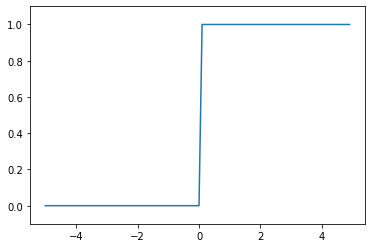

In [ ]:
# 계단함수의 그래프
import matplotlib.pyplot as plt
import numpy as np
def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열을 생성한다. [-5.0, -4.9, -4.8, ... , 4.9]
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 시그모이드 함수

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

* 브로드캐스트
  * 위 함수가 넘파이 배열도 잘 처리할 수 있는 이유는 넘파이의 브로드캐스트에 있다. 
  * 넘파이에서는 형상이 다른 배열끼리도 계산할 수 있다. 
  * 예를 들어 2X2 행렬 A에 스칼라값 10을 곱하면, 10이라는 스칼라값이 2X2 행렬로 확대된 후 연산이 이루어진다. 이 기능을 브로드캐스트(broadcast)라고 한다.

> 스칼라값이란?<br>하나의 숫자로만 표시되는 양. 즉 단지 크기만 있는 물리량이다. 벡터, 텐서 등이 방향과 크기가 있는 물리량인데 비해 **방향의 구별이 없는 수량이다.** 예를 들어 스칼라값은 |-1|, |2|등으로 표기되는 **절대값**이고, 벡터는 +3, -4, +2 등 방향까지 포함된 값으로 볼 수 있다.<br>출처:https://ko.wikipedia.org/wiki/%EC%8A%A4%EC%B9%BC%EB%9D%BC_(%EB%AC%BC%EB%A6%AC)

즉, 브로드캐스트 기능이란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것이다.

In [ ]:
# 브로드캐스트 예시
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

임의의 스칼라값과 넘파이 배열의 각 원소의 연산이 이루어지는 것을 확인할 수 있다. 앞서 구현한 sigmoid 함수에서도 np.exp(-x)가 넘파이 배열을 반환하기 때문에, 1 / (1 + np.exp(-x))도 넘파이 각 원소에 연산한 결과를 반환한다.

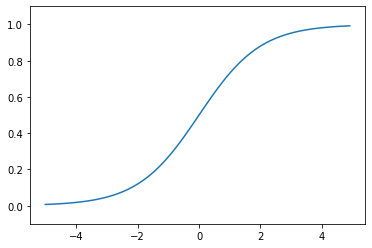

In [ ]:
# 시그모이드 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()